# **<center><span style= "color:#8FB31D;">Linear regression with multivariable</span></center>**

## ***<span style= "color:maroon;">Contents </span>***
- ***`Imports`*** 
- **`Intializing the dataset`** 
- **`Linear regrssion model`**
- **`Evaluate the model`**
- **`Ploting the residual error`**

## ***<span style= "color:purple;">Imports </span>***

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [6]:
# loading dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns= data.feature_names)
df['Target'] = data.target


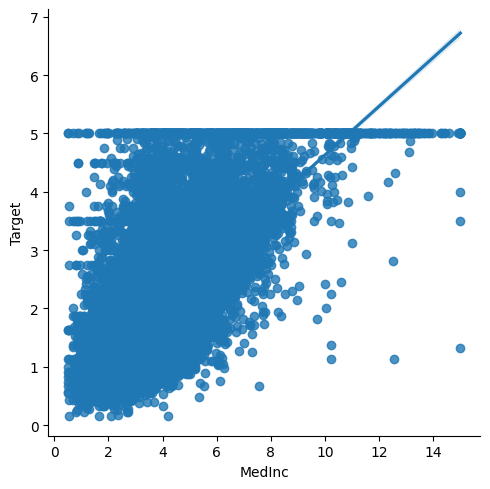

In [7]:
sns.lmplot(data=df, x="MedInc", y="Target")

In [8]:
# looking for correlation between variables
correlation_matrix = df.corr()


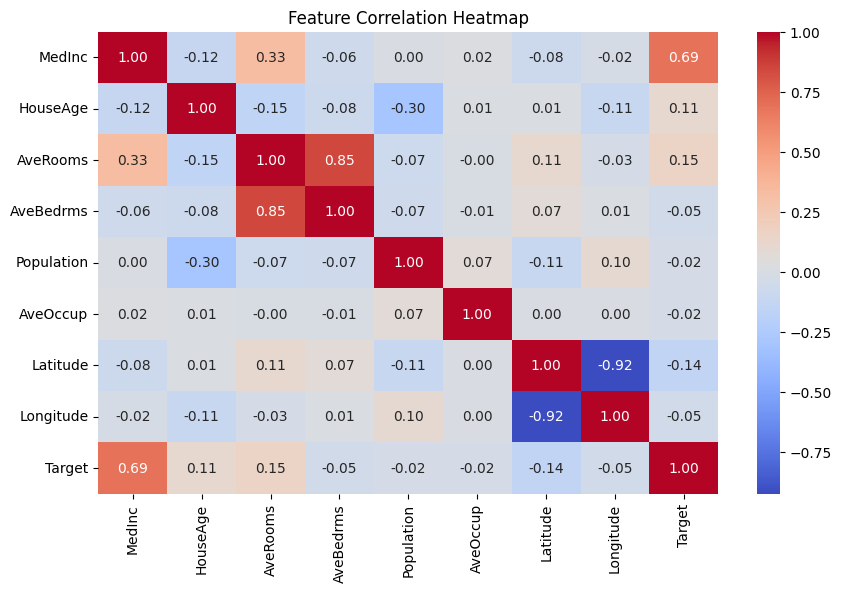

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [10]:
# Seperating the dependent variable and independent variables 
X = df.drop(columns=['Target'])
y = df['Target']

In [11]:
# spliting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


## ***<span style= "color:#6A5ACD;">Implementing linear regression model </span>***

In [12]:
model = LinearRegression()

In [13]:
#stadardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
cross_val_score(model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=10)

array([-0.56799593, -0.52918854, -0.48456478, -0.51627013, -0.54833859,
       -0.47884524, -0.47828648, -0.55465187, -0.55647389, -0.54248888])

In [15]:
model.fit(X_train_scaled, y_train)

LinearRegression()

## ***<span style= "color:#BDB76B;">Evaluating the model</span>***

In [16]:
print(model.intercept_)

2.0692396089424165


In [17]:
print(model.coef_)

[ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]


In [18]:
y_pred = model.predict(X_test_scaled)


In [19]:
y_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

In [20]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
print("mean absolute error", mean_absolute_error(y_test,y_pred))

Mean Squared Error: 0.5305677824766751
R^2 Score: 0.5957702326061665
mean absolute error 0.5272474538305952


## ***<span style= "color:#D2691E;">Ploting residual error of Linear regression </span>***

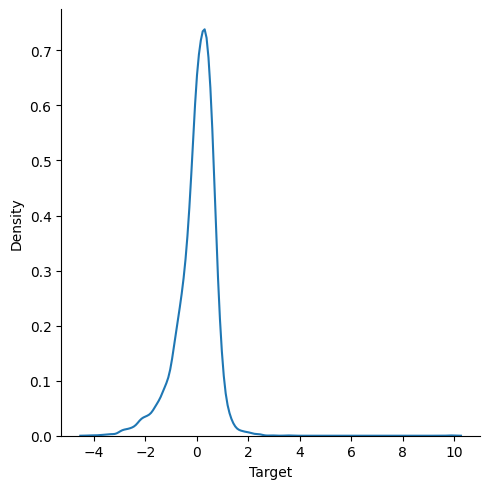

In [21]:
sns.displot(y_pred-y_test,kind='kde')


## ***<span style= "color:#66CDAA;">Regularizations</span>***

- **`Ridge regression (l2)`**
- **`Lasso regrssion (L1)`**

In [ ]:
# Intializaiton of Ridge Regression model (L2)
ridge_regressor = Ridge()


In [29]:
parameters = {'alpha': [1,2,5,10,20,30,40,50,60,70,80,90]}
ridgeCv = GridSearchCV(estimator=ridge_regressor,param_grid=parameters,scoring='neg_mean_squared_error',cv=5)


In [ ]:
ridgeCv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [32]:
# for this problem statment this alpha is the best
print(ridgeCv.best_params_)

{'alpha': 5}


In [33]:
print(ridgeCv.best_score_)

-0.5268179966861515


In [39]:
X_test_scaled

array([[-1.1526893 , -0.28346293, -0.50781822, ...,  0.06127763,
         0.19166399,  0.28664112],
       [-0.70640568,  0.11294728, -0.16252032, ..., -0.03551561,
        -0.23911452,  0.06196251],
       [-0.20830675,  1.85715216, -0.59546738, ..., -0.14215427,
         1.00639726, -1.42590916],
       ...,
       [-0.19155996, -0.99700129, -0.6830438 , ..., -0.06058827,
        -0.92742367,  0.8358555 ],
       [-0.11911302, -1.47269353,  0.02607207, ...,  0.03461374,
         1.01576201, -0.84673764],
       [-0.43304974, -0.91771925, -0.84872893, ..., -0.0407528 ,
        -0.70266966,  0.67109119]])

In [40]:
ridge_pred = ridgeCv.predict(X_test_scaled)

In [41]:
ridge_pred

array([0.72799408, 1.76647219, 2.70889662, ..., 2.07364426, 1.57452579,
       1.82666041])

## ***<span style= "color:#D2691E;">Ploting residual error for L2</span>***

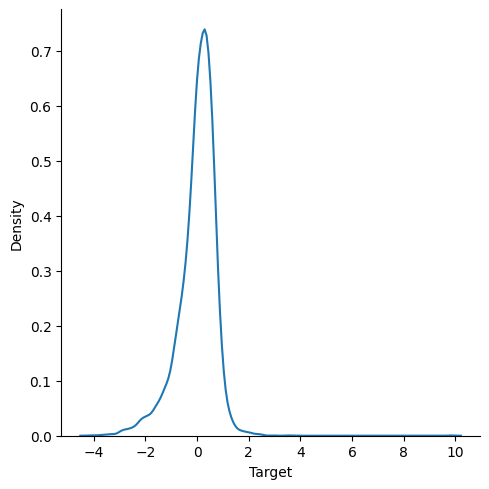

In [42]:
sns.displot(ridge_pred-y_test,kind='kde')

- **`Lasso regrssion (L1)`**

In [47]:
# Intializaiton of Lasso Regression model (L1)
lasso_regressor = Lasso()


In [48]:
parameters = {'alpha': [1,2,5,10,20,30,40,50,60,70,80,90]}
lassoCv = GridSearchCV(estimator=lasso_regressor,param_grid=parameters,scoring='neg_mean_squared_error',cv=5)


In [49]:
lassoCv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [50]:
# for this problem statment this alpha is the best
print(lassoCv.best_params_)

{'alpha': 1}


In [51]:
print(lassoCv.best_score_)

-1.3400019579636542


In [ ]:
X_test_scaled

array([[-1.1526893 , -0.28346293, -0.50781822, ...,  0.06127763,
         0.19166399,  0.28664112],
       [-0.70640568,  0.11294728, -0.16252032, ..., -0.03551561,
        -0.23911452,  0.06196251],
       [-0.20830675,  1.85715216, -0.59546738, ..., -0.14215427,
         1.00639726, -1.42590916],
       ...,
       [-0.19155996, -0.99700129, -0.6830438 , ..., -0.06058827,
        -0.92742367,  0.8358555 ],
       [-0.11911302, -1.47269353,  0.02607207, ...,  0.03461374,
         1.01576201, -0.84673764],
       [-0.43304974, -0.91771925, -0.84872893, ..., -0.0407528 ,
        -0.70266966,  0.67109119]])

In [52]:
lasso_pred = lassoCv.predict(X_test_scaled)

In [53]:
lasso_pred

array([2.06923961, 2.06923961, 2.06923961, ..., 2.06923961, 2.06923961,
       2.06923961])

## ***<span style= "color:#D2691E;">Ploting residual error (L1)</span>***

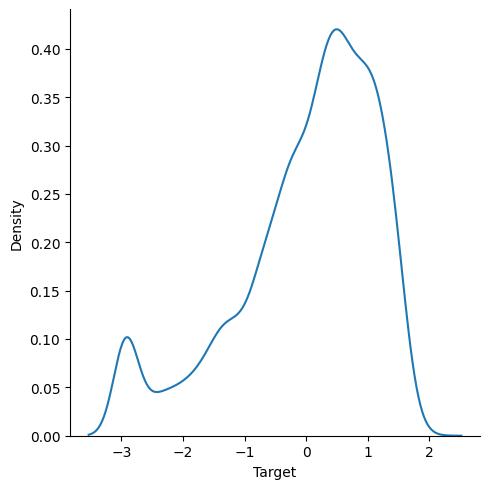

In [56]:
sns.displot(lasso_pred-y_test,kind='kde')